<a href="https://colab.research.google.com/github/jhasahab369/STOCK_prediction/blob/main/Stock_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK MARKET PREDICTION **

In [ ]:
import pandas_datareader as pdr


In [ ]:


df= pdr.get_data_tiingo('AAPL',api_key= 'a1c11177a071ad891483f549d2c496d7d9ebad64' )

<ipython-input-4-1bc54f2d4117>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df= pdr.get_data_tiingo('AAPL',api_key= 'a1c11177a071ad891483f549d2c496d7d9ebad64' )


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-12-14 00:00:00+00:00  165.48  169.08  165.28  169.00  40703710   
       2018-12-17 00:00:00+00:00  163.94  168.35  162.73  165.45  44287922   
       2018-12-18 00:00:00+00:00  166.07  167.53  164.39  165.38  33841518   
       2018-12-19 00:00:00+00:00  160.89  167.45  159.09  166.00  49047297   
       2018-12-20 00:00:00+00:00  156.83  162.11  155.30  160.40  64772960   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-12-14 00:00:00+00:00  39.706129  40.569932  39.658140  40.550736   
       2018-12-17 00:00:00+00:00  39.336614  40.394772  39.046280  39.698931   
       2018-12-18 00:00:00+00:00  39.847697  40.198017  39.444589  39.682135   
       2018-12-19 00:00:00+00:00  38.604781  40.178821  38.172880  39.830901   
       2018-12-20 00:00:00+00:00  37.630603  38.897514  37.263487  38.487208   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-12-14 00:00:00+00:00  162814840      0.0          1.0  
       2018-12-17 00:00:00+00:00  177151688      0.0          1.0  
       2018-12-18 00:00:00+00:00  135366072      0.0          1.0  
       2018-12-19 00:00:00+00:00  196189188      0.0          1.0  
       2018-12-20 00:00:00+00:00  259091840      0.0          1.0

In [ ]:
df.tail()

close    high      low    open    volume  \
symbol date                                                                   
AAPL   2023-12-06 00:00:00+00:00  192.32  194.76  192.110  194.45  40895115   
       2023-12-07 00:00:00+00:00  194.27  195.00  193.590  193.63  47477655   
       2023-12-08 00:00:00+00:00  195.71  195.99  193.670  194.20  53406358   
       2023-12-11 00:00:00+00:00  193.18  193.49  191.420  193.11  60943699   
       2023-12-12 00:00:00+00:00  194.71  194.72  191.721  193.08  52696900   

                                  adjClose  adjHigh   adjLow  adjOpen  \
symbol date                                                             
AAPL   2023-12-06 00:00:00+00:00    192.32   194.76  192.110   194.45   
       2023-12-07 00:00:00+00:00    194.27   195.00  193.590   193.63   
       2023-12-08 00:00:00+00:00    195.71   195.99  193.670   194.20   
       2023-12-11 00:00:00+00:00    193.18   193.49  191.420   193.11   
       2023-12-12 00:00:00+00:00    194.71   194.72  191.721   193.08   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-12-06 00:00:00+00:00   40895115      0.0          1.0  
       2023-12-07 00:00:00+00:00   47477655      0.0          1.0  
       2023-12-08 00:00:00+00:00   53406358      0.0          1.0  
       2023-12-11 00:00:00+00:00   60943699      0.0          1.0  
       2023-12-12 00:00:00+00:00   52696900      0.0          1.0

In [ ]:
df2= df.reset_index()['close']
#this means by reset index we have all colourm data, and when we specify what do we want then we get the close coloumn

In [ ]:
df2.shape

(1257, 14)

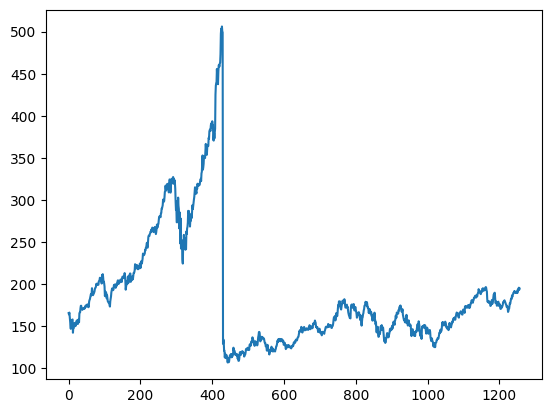

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [ ]:
#LSTM sensitive to scale hence transformation is required for them


import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))   #to scale the data set
df2= scaler.fit_transform(np.array(df2).reshape(-1,1))


In [ ]:
df2.shape

(1257, 1)

In [ ]:
df2

array([[0.14687539],
       [0.14301816],
       [0.14835316],
       ...,
       [0.22259236],
       [0.21625548],
       [0.22008766]])

In [ ]:
#this is how this gets transformed from 0 to 1

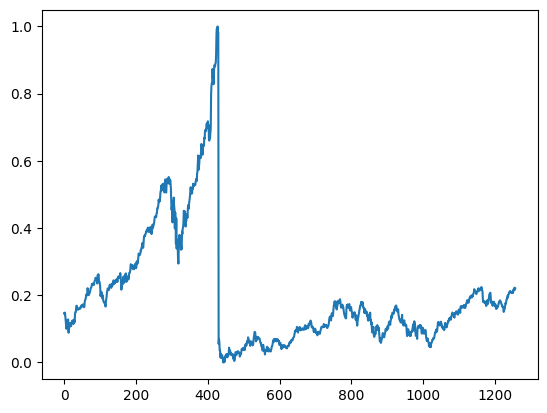

In [ ]:
plt.plot(df2)

In [ ]:
#Notice that the graph is exactly the same, just the scaling has changed


In [ ]:
#now we have to split the data set into train and test data

training_size = int(len(df2)*0.65)
test_size = len(df2)- training_size
train_data, test_data= df2[0:training_size,:], df2[training_size: len(df2),:1]

In [ ]:
train_data.shape, test_data.shape, df.shape

((817, 1), (440, 1), (1257, 12))

In [ ]:
# X will be t, t+1...t+n-1 and Y will be t

In [ ]:
#This is pretty much the norm in the time series data sets
import numpy as np
def create_dataset(dataset , time_steps=1 ):
  dataX, dataY= [], []
  for i in range(len(dataset)-1 - time_steps):
    a= dataset[i:(i+time_steps),0]
    dataX.append(a)
    dataY.append(dataset[i+time_steps, 0])
  return np.array(dataX), np.array(dataY)



time_steps=100

X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test= create_dataset(test_data , time_steps)

In [ ]:
print(X_train)


[[0.14687539 0.14301816 0.14835316 ... 0.24050094 0.24060113 0.23514089]
 [0.14301816 0.14835316 0.13537884 ... 0.24060113 0.23514089 0.22627426]
 [0.14835316 0.13537884 0.12520977 ... 0.23514089 0.22627426 0.19757044]
 ...
 [0.09247339 0.09517846 0.09946149 ... 0.14108954 0.13139637 0.12673763]
 [0.09517846 0.09946149 0.10499687 ... 0.13139637 0.12673763 0.14053851]
 [0.09946149 0.10499687 0.10624922 ... 0.12673763 0.14053851 0.12944271]]


In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((716, 100), (716,), (339, 100), (339,))

**NOW WE WILL CREATE A STACKED LSTM MODEL **

In [ ]:
#for the lstm model we need to reshape the two dimensional array into 3 dimensional entity

X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)

X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
#Create a Stacked LSTM model
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM




In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences= True ,input_shape=(100,1) ))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1)) #added one final dense layer model , to give a single output
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## NOW WE HAVE TO FIT OUR DATA IN THE MODEL


model.fit(X_train, Y_train , validation_data=(X_test, Y_test), epochs=100, batch_size= 64 , verbose =1 )

Epoch 1/100
12/12 [==============================] - 12s 356ms/step - loss: 0.0407 - val_loss: 0.0016
Epoch 2/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0130 - val_loss: 0.0023
Epoch 3/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0114 - val_loss: 5.0810e-04
Epoch 4/100
12/12 [==============================] - 4s 314ms/step - loss: 0.0090 - val_loss: 3.5849e-04
Epoch 5/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0078 - val_loss: 2.7112e-04
Epoch 6/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0074 - val_loss: 5.4534e-04
Epoch 7/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0065 - val_loss: 4.1961e-04
Epoch 8/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0057 - val_loss: 2.6966e-04
Epoch 9/100
12/12 [==============================] - 4s 318ms/step - loss: 0.0053 - val_loss: 5.4974e-04
Epoch 10/100
12/12 [==============================] - 2s 195ms

In [ ]:
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

#since we scaled it already, we need to do now the scler inverse transform

train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

11/11 [==============================] - 0s 37ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error as mse
math.sqrt( mse (Y_train, train_predict))

219.49570780067606

In [ ]:
math.sqrt(mse (Y_test, test_predict ))

165.38871458400024

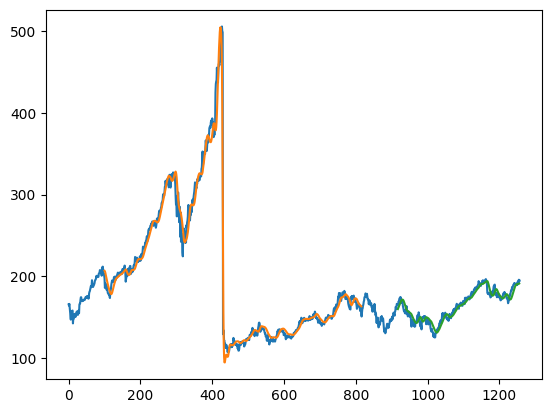

In [ ]:
look_back= 100

train_predicted_plot= np.empty_like(df2)
train_predicted_plot[:, :]= np.nan
train_predicted_plot[look_back: len(train_predict)+ look_back , : ]= train_predict


test_predicted_plot = np.empty_like(df2)
test_predicted_plot[:, :]= np.nan
test_predicted_plot[len(train_predict)+ (look_back*2)+1: len(df2)-1 , :]= test_predict



plt.plot(scaler.inverse_transform(df2))
plt.plot(train_predicted_plot)
plt.plot(test_predicted_plot)

**APPLE STOCK PREDICTION **

1. Blue= Original market value
2. orange = Predicted on train case
3. Green= Predicted on test case

In [ ]:
#NOW THE TIME FOR FUTURE PREDICTION OF THE MODEL





In [ ]:
len(test_data)


440

In [ ]:
X_input= test_data[340:].reshape(1, -1)
X_input

array([[0.21517846, 0.21735755, 0.21956168, 0.21635567, 0.22289292,
        0.22444584, 0.22232937, 0.21475266, 0.21122104, 0.18822793,
        0.18036318, 0.18274264, 0.17871008, 0.17815905, 0.1777082 ,
        0.18189105, 0.17685661, 0.17465247, 0.1682154 , 0.16944271,
        0.17282405, 0.17630557, 0.18604884, 0.17417658, 0.17976205,
        0.18371947, 0.19356293, 0.20240451, 0.20295554, 0.20693801,
        0.20753914, 0.19053225, 0.17713212, 0.17868503, 0.18164058,
        0.17397621, 0.16874139, 0.17257358, 0.17074515, 0.17815905,
        0.18091421, 0.1719474 , 0.16804008, 0.17019411, 0.17342517,
        0.16310582, 0.15927364, 0.15992486, 0.1612273 , 0.16758923,
        0.16420789, 0.16736381, 0.17049468, 0.17695679, 0.18071384,
        0.17921102, 0.18274264, 0.18502192, 0.18036318, 0.18003757,
        0.1761052 , 0.17282405, 0.17187226, 0.16541014, 0.16571071,
        0.16681277, 0.16095178, 0.15040701, 0.15373826, 0.15892298,
        0.16012523, 0.16814026, 0.17715717, 0.17

In [ ]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [ ]:
temp_input

[0.215178459611772,
 0.21735754539762048,
 0.21956167814652466,
 0.21635566687539132,
 0.22289292423293672,
 0.22444583594239192,
 0.22232936756418276,
 0.21475266123982467,
 0.21122103944896675,
 0.1882279273638071,
 0.18036318096430803,
 0.18274264245460237,
 0.1787100814026299,
 0.17815904821540385,
 0.17770820288040068,
 0.18189104571070758,
 0.1768566061365059,
 0.1746524733876017,
 0.16821540388227924,
 0.16944270507200998,
 0.17282404508453347,
 0.17630557294927984,
 0.18604884157795865,
 0.17417658108954281,
 0.17976205385097055,
 0.18371947401377575,
 0.1935629304946775,
 0.20240450845335,
 0.20295554164057605,
 0.20693800876643703,
 0.20753913587977452,
 0.19053224796493418,
 0.1771321227301189,
 0.17868503443957418,
 0.18164057608015027,
 0.17397620538509706,
 0.16874139010644956,
 0.17257357545397617,
 0.17074514715090788,
 0.17815904821540385,
 0.18091421415153408,
 0.17194740137758296,
 0.16804007514088914,
 0.17019411396368184,
 0.173425172197871,
 0.16310582341891044,
 

In [ ]:
# logic to predict for next 30 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.17282405 0.17187226 0.16541014 0.16571071 0.16681277 0.16095178
 0.15040701 0.15373826 0.15892298 0.16012523 0.16814026 0.17715717
 0.17485285 0.18131497 0.18780213 0.19048215 0.1892799  0.19927364
 0.19526612 0.20187852 0.2033062  0.20756418 0.20751409 0.21192235
 0.20989355 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259
 0.20816531 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856
 0.22259236 0.21625548 0.22008766 0.21305047 0.21305047 0.21305047
 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047
 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047
 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047
 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047
 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047
 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047
 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047 0.21305047
 0.21305047 0.21305047 0.21305047 0.21305047 0.2130

In [ ]:
import numpy as np
day_new= np.arange(1,101)
day_pred= np.arange(101,131)


In [ ]:
len(df2)


1257

In [ ]:
df3= df2.tolist()
df3.extend(lst_output)

In [ ]:
len(df3)

1257

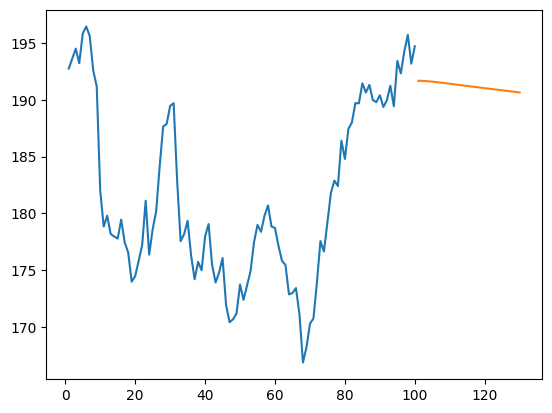

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df2[1157:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

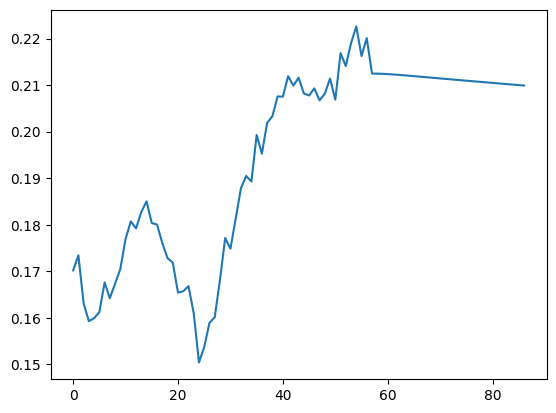

In [ ]:

df3= df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])